In [1]:
#Imorting important library.
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Importing deep learning library.
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout

C:\Users\Hitesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Hitesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Hitesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Hitesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: P

In [2]:
mnist_df=pd.read_csv("C://Users//Hitesh//Downloads//27352_34877_compressed_mnist_train.csv//mnist_train.csv")
print(mnist_df.head(10))

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   
5      2    0    0    0    0    0    0    0    0    0  ...      0      0   
6      1    0    0    0    0    0    0    0    0    0  ...      0      0   
7      3    0    0    0    0    0    0    0    0    0  ...      0      0   
8      1    0    0    0    0    0    0    0    0    0  ...      0      0   
9      4    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0

In [3]:
mnist_df.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [4]:
#splitting data into independent and dependent features.
x_data=mnist_df.iloc[:,1:].values.reshape(len(mnist_df),28,28,1)
y_data=mnist_df.iloc[:,0]

In [5]:
x_data

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [6]:
y_data.head(5)

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [7]:
y=tensorflow.keras.utils.to_categorical(y_data,num_classes=10)

In [8]:
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [9]:
x_data=np.array(x_data)
y=np.array(y)

In [10]:
x_data.shape

(60000, 28, 28, 1)

In [11]:
y_data

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64

In [13]:
#slpitting data into training and testing variable.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y,test_size=0.2,random_state=4)

In [14]:
#creating a object of sequential model.
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
#model.add(Dense(activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [16]:
#training model.
model.fit(x_train,y_train,validation_data=(x_test,y_test))

Train on 48000 samples, validate on 12000 samples
48000/48000 [==============================] - 40s 841us/sample - loss: 1.8641 - accuracy: 0.9145 - val_loss: 0.1209 - val_accuracy: 0.9639


In [17]:
model.evaluate(x_test,y_test)

12000/12000 [==============================] - 2s 185us/sample - loss: 0.1209 - accuracy: 0.9639


[0.12087382843283316, 0.96391666]

In [18]:
prediction=model.predict(x_test[:4])
prediction

array([[1.8823755e-04, 8.0277772e-05, 9.9147320e-01, 3.8064434e-03,
        2.0855537e-06, 1.0809232e-06, 6.9316016e-08, 4.0921423e-04,
        3.7655912e-03, 2.7372994e-04],
       [9.9651868e-07, 9.7638804e-07, 5.9820891e-06, 1.8466742e-06,
        3.4157158e-06, 1.2570571e-06, 3.6429537e-07, 9.9993169e-01,
        1.2902596e-05, 4.0685616e-05],
       [2.8086703e-08, 1.1129167e-06, 3.9742143e-09, 2.8759027e-07,
        6.8505534e-07, 6.1782175e-06, 9.9999082e-01, 3.1034209e-09,
        2.1295424e-08, 8.8897929e-07],
       [6.9465991e-06, 9.9939358e-01, 4.0912573e-06, 7.7386130e-06,
        1.6987436e-04, 1.1821437e-06, 1.4367055e-05, 2.4471941e-04,
        1.0719861e-04, 5.0325078e-05]], dtype=float32)

In [19]:
#Print prediction on number labels.
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[2 7 6 1]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


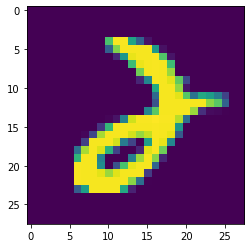

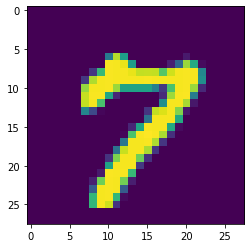

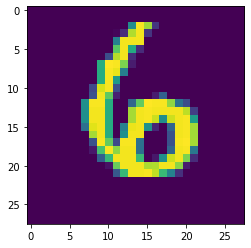

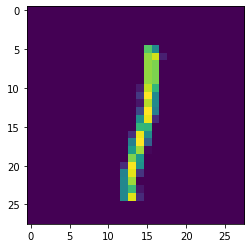

In [20]:
#show first 4 images into pictures.
for i in range(0,4):
    image=x_test[i]
    image=np.array(image,dtype='float')
    pixels=image.reshape(28,28)
    plt.imshow(pixels)
    plt.show()